In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report



In [139]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,CustomerID,Gender,MaritalStatus,IncomeLevel,TransactionDate,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,ServiceUsage,LoggedInLast30Days,Age,AmountSpent,LoginFrequency,DaysSinceTransaction,DaysSinceInteraction,DaysSinceLogin,InteractionLag,ChurnStatus
0,1,1,2,1,2022-03-27,2022-03-31,2,0,2023-10-21,0,False,1.222379,1.131382,0.572791,0.903001,0.905346,-1.039297,0.011595,0
1,2,1,1,1,2022-08-08,2022-03-17,2,0,2023-12-05,2,False,1.416820,-1.391297,-1.482595,-0.379422,1.042093,-1.469922,-1.018477,1
2,2,1,1,1,2022-07-25,2022-03-17,2,0,2023-12-05,2,False,1.416820,-0.396711,-1.482595,-0.245437,1.042093,-1.469922,-0.921038,1
3,2,1,1,1,2022-01-25,2022-03-17,2,0,2023-12-05,2,False,1.416820,-1.067885,-1.482595,1.486791,1.042093,-1.469922,0.338713,1
4,2,1,1,1,2022-07-24,2022-03-17,2,0,2023-12-05,2,False,1.416820,0.997901,-1.482595,-0.235867,1.042093,-1.469922,-0.914078,1


In [140]:
#Dropping features
df.drop(['CustomerID','TransactionDate','InteractionDate','LastLoginDate'],axis=1,inplace=True)
df.sample()

,Gender,MaritalStatus,IncomeLevel,InteractionType,ResolutionStatus,ServiceUsage,LoggedInLast30Days,Age,AmountSpent,LoginFrequency,DaysSinceTransaction,DaysSinceInteraction,DaysSinceLogin,InteractionLag,ChurnStatus
5092,0,3,1,0,1,1,False,0.574243,-0.535704,0.147539,0.051243,-0.657477,0.587507,0.505752,0


In [141]:
#Input features
X = np.asarray(df[['Gender','MaritalStatus','IncomeLevel','InteractionType','ResolutionStatus',
                   'ServiceUsage','LoggedInLast30Days','Age','AmountSpent','LoginFrequency',
                    'DaysSinceTransaction','DaysSinceInteraction','DaysSinceLogin','InteractionLag']])
X[0:5]


array([[1, 2, 1, 2, 0, 0, False, 1.222378999743409, 1.1313823468643365,
        0.5727913029010999, 0.903001361947712, 0.9053464158949436,
        -1.0392972688748352, 0.0115954558933542],
       [1, 1, 1, 2, 0, 2, False, 1.4168197971594696, -1.391296881051639,
        -1.482594774770213, -0.3794216711979233, 1.0420934221693128,
        -1.4699219925053435, -1.0184769045927264],
       [1, 1, 1, 2, 0, 2, False, 1.4168197971594696, -0.3967106744157395,
        -1.482594774770213, -0.245437175197633, 1.0420934221693128,
        -1.4699219925053435, -0.9210376272494484],
       [1, 1, 1, 2, 0, 2, False, 1.4168197971594696, -1.067885412849212,
        -1.482594774770213, 1.4867909516632625, 1.0420934221693128,
        -1.4699219925053435, 0.3387130298315015],
       [1, 1, 1, 2, 0, 2, False, 1.4168197971594696, 0.997900979297725,
        -1.482594774770213, -0.2358668540547552, 1.0420934221693128,
        -1.4699219925053435, -0.9140776788677856]], dtype=object)

In [142]:
#target variable
y = np.asarray(df['ChurnStatus'])
y[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [143]:
#splitting the data into training set
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(x_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [144]:
#prediction probability
yhat_prob = LR.predict_proba(x_test)
yhat_prob[:10]

array([[0.85180806, 0.14819194],
       [0.88102238, 0.11897762],
       [0.9297456 , 0.0702544 ],
       [0.88705136, 0.11294864],
       [0.86864831, 0.13135169],
       [0.83246521, 0.16753479],
       [0.81642793, 0.18357207],
       [0.72039261, 0.27960739],
       [0.76670635, 0.23329365],
       [0.80519816, 0.19480184]])

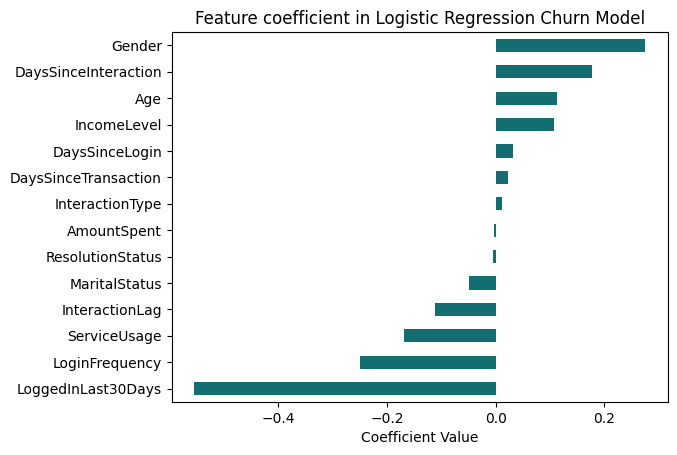

In [145]:
#role of each feature in prediction of churn
coefficients = pd.Series(LR.coef_[0],index = df.columns[:-1])
coefficients.sort_values().plot(kind= 'barh',color='#146d70')
plt.title('Feature coefficient in Logistic Regression Churn Model')
plt.xlabel("Coefficient Value")
plt.show()

In [146]:
#Logisitc regression performance analysis
log_loss(y_test,yhat_prob)

0.5081006022417681

In [147]:
#Dropping weak features
X1 = np.asarray(df[['Gender','MaritalStatus','IncomeLevel',
                   'ServiceUsage','LoggedInLast30Days','Age','LoginFrequency',
                    'DaysSinceTransaction','DaysSinceInteraction','DaysSinceLogin','InteractionLag']])
X1[0:5]

array([[1, 2, 1, 0, False, 1.222378999743409, 0.5727913029010999,
        0.903001361947712, 0.9053464158949436, -1.0392972688748352,
        0.0115954558933542],
       [1, 1, 1, 2, False, 1.4168197971594696, -1.482594774770213,
        -0.3794216711979233, 1.0420934221693128, -1.4699219925053435,
        -1.0184769045927264],
       [1, 1, 1, 2, False, 1.4168197971594696, -1.482594774770213,
        -0.245437175197633, 1.0420934221693128, -1.4699219925053435,
        -0.9210376272494484],
       [1, 1, 1, 2, False, 1.4168197971594696, -1.482594774770213,
        1.4867909516632625, 1.0420934221693128, -1.4699219925053435,
        0.3387130298315015],
       [1, 1, 1, 2, False, 1.4168197971594696, -1.482594774770213,
        -0.2358668540547552, 1.0420934221693128, -1.4699219925053435,
        -0.9140776788677856]], dtype=object)

In [148]:
#training linear regression again
X1_train,x1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.2,random_state=24)
lr1 = LogisticRegression().fit(X1_train,y_train)
yhat1 = lr1.predict(x1_test)
yhat1_prob = lr1.predict_proba(x1_test)

In [149]:
#log loss
log_loss(y_test,yhat1_prob)

0.5080708161752007

In [150]:
#Initialize models
rf = RandomForestClassifier(n_estimators=100,random_state=24)
rf1 = RandomForestClassifier(n_estimators=100,random_state=24)
xgb = XGBClassifier(n_estimators =100,random_state = 24)
xgb1 = XGBClassifier(n_estimators = 100,random_state = 24)
#fit the models
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train)
rf1.fit(X1_train,y1_train)
xgb1.fit(X1_train,y1_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [151]:
#prediction
#for random forest
yhat_rf = rf.predict(x_test)
yhat1_rf = rf1.predict(x1_test)
#for xgboost
yhat_xgb = xgb.predict(x_test)
yhat1_xgb = xgb1.predict(x1_test)

In [152]:
#Evaluate the models
print('Random Forest Model accuracy for all features:',accuracy_score(y_test,yhat_rf))
print('Random Forest Model Auc for all features:',roc_auc_score(y_test,yhat_rf))
print('Random Forest Model accuracy for selected features:',accuracy_score(y1_test,yhat1_rf))
print('Random Forest Model Auc for selected features:',roc_auc_score(y1_test,yhat1_rf))

print('XGboost Model accuracy for all features:',accuracy_score(y_test,yhat_xgb))
print('XGboost Model Auc for all features:',roc_auc_score(y_test,yhat_xgb))
print('XGboost Model accuracy for selected features:',accuracy_score(y1_test,yhat1_xgb))
print('XGboost Model Auc for selected features:',roc_auc_score(y1_test,yhat1_xgb))

Random Forest Model accuracy for all features: 0.9875120076849183
Random Forest Model Auc for all features: 0.9714912280701755
Random Forest Model accuracy for selected features: 0.9942363112391931
Random Forest Model Auc for selected features: 0.986842105263158
XGboost Model accuracy for all features: 0.9971181556195965
XGboost Model Auc for all features: 0.993421052631579
XGboost Model accuracy for selected features: 0.9990393852065321
XGboost Model Auc for selected features: 0.9978070175438596


In [153]:
#k-fold cross calidation
kf = KFold(n_splits=10,random_state = 24,shuffle=True)
#cross validation for random forest
rf_cv = cross_val_score(rf,X_train,y_train,cv=kf,scoring='accuracy')
rf1_cv = cross_val_score(rf1,X1_train,y1_train,cv=kf,scoring='accuracy')
#cross validation for xgboost
xgb_cv = cross_val_score(xgb,X_train,y_train,cv=kf,scoring='accuracy')
xgb1_cv = cross_val_score(xgb1,X1_train,y1_train,cv=kf,scoring='accuracy')

In [154]:
print('Random forest cross validation score for all features:',rf_cv.mean())
print('Random forest cross validation score for selected features:',rf1_cv.mean())
print('XGboost cross validation score for all features:',xgb_cv.mean())
print('XGboost cross validation score for selected features:',xgb1_cv.mean())

Random forest cross validation score for all features: 0.9747751798561151
Random forest cross validation score for selected features: 0.9848655690831949
XGboost cross validation score for all features: 0.9896715320051651
XGboost cross validation score for selected features: 0.9896709555432576


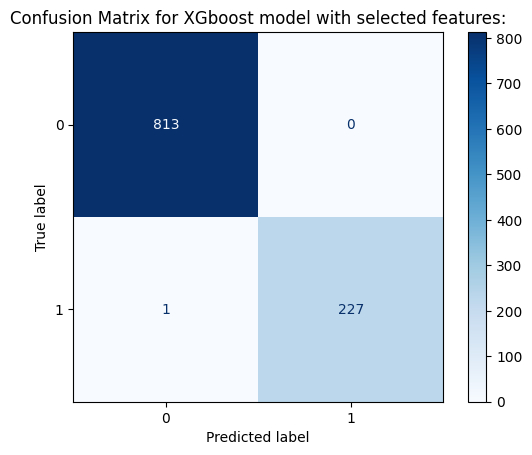

Classification Report for XGboost model with selected features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       813
           1       1.00      1.00      1.00       228

    accuracy                           1.00      1041
   macro avg       1.00      1.00      1.00      1041
weighted avg       1.00      1.00      1.00      1041



In [155]:
#final model is xgboost with selected features
#confusionmatrix
cm = confusion_matrix(y1_test,yhat1_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGboost model with selected features:')
plt.show()

#Report of classification
print('Classification Report for XGboost model with selected features:')
print(classification_report(y1_test,yhat1_xgb))